# WordNet Analysis

The [TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#wordnet-integration) library has an interesting feature called `path_similarity` which could be used to see how similar words are.

In [87]:
# Preamble
from textblob.wordnet import Synset
from textblob import Word
import numpy as np
import pickle
from math import isnan
from matplotlib import pyplot

In [36]:
def load_model_words():
    "Load a model_words"
    global model_words
    with open("models/model_words.pickle", "rb") as pickle_file:        
        model_words = pickle.load(pickle_file)
    print("model_words loaded")

load_model_words()

model_words loaded


In [48]:
def clean_up_words(dirty_words):
    "Figure out which words are not in synsets"
    words, not_words = [], []
    for word in dirty_words:
        if len(Word(word).synsets) != 0: words.append(Word(word).synsets[0])
        if len(Word(word).synsets) == 0: not_words.append(word)
    return words, not_words

words, not_words = clean_up_words(model_words)

In [49]:
len(words) # Number of words which are in synsets

474

In [50]:
len(not_words) # Number of words not in synsets

74

Out of the 548 words we started with, 74 words are not in the WordNet system. The words which will be excluded in the analysis are listed bellow. This means that we will primarily be working with 474 words.

In [51]:
len(model_words)

548

In [52]:
not_words

['zyprexa',
 'hemodynamically',
 'ambien',
 'apap',
 '',
 'tegretol',
 'micu',
 'name11',
 'namepattern4',
 'stitle',
 'extubated',
 'illicits',
 'lastname',
 'namepattern1',
 'psych',
 'etoh',
 'hospital1',
 'mellitus',
 'ivdu',
 'risperdal',
 'hospital6',
 'mucomyst',
 'dispo',
 'lvef',
 'copd',
 'gerd',
 'oxycodone',
 'cath',
 'schizoaffective',
 'hospital3',
 'percocet',
 'poly',
 'polysubstance',
 'approx',
 'withdrawl',
 'name8',
 'resp',
 'namepattern2',
 'dyslipidemia',
 'trach',
 'seroquel',
 'benzos',
 'listerine',
 'benzo',
 'lfts',
 'klonopin',
 'rehab',
 'ciwa',
 'clonazepam',
 'depakote',
 'creatinine',
 'valproic',
 'effexor',
 'vicodin',
 'eval',
 'trazadone',
 'mrsa',
 'medquist36',
 'rhabdomyolysis',
 'name2',
 'lexapro',
 'hepatology',
 'suicidality',
 'wellbutrin',
 'hypothyroid',
 'colectomy',
 'cardiothoracic',
 'dxed',
 'pcwp',
 'noncontributory',
 'utis',
 'lamictal',
 'oopherectomy',
 'hiatal']

## Heatmap

Now that we have the words, the goal is to create a heatmap where words that are close by (via `path_similarity`) have higher values.

Important notes about using `path_similarity` via [this site](https://nlpforhackers.io/wordnet-sentence-similarity/):
- Wordnet has some issues with computing the similarity between adjectives and adverbs
- Some Wordnet similarity measures misbehave
- Values that are nan will just be set to zero in our case

In [83]:
def get_distances():
    "Get the distances between different points"
    distances = np.empty([len(words), len(words)])
    dist = lambda a,b: a.path_similarity(b)
    
    # For all the words, generate the the distance plot:
    for index, word in enumerate(words):
        for index2, word2 in enumerate(words):
            tmp_dist = dist(word, word2)
            if tmp_dist is not None:
                distances[index][index2] = tmp_dist
            else:
                distances[index][index2] = 0.0
    
    return distances

In [84]:
distances = get_distances()

In [95]:
np.mean(distances)

0.06618066730873723

In [97]:
np.median(distances)

0.06666666666666667

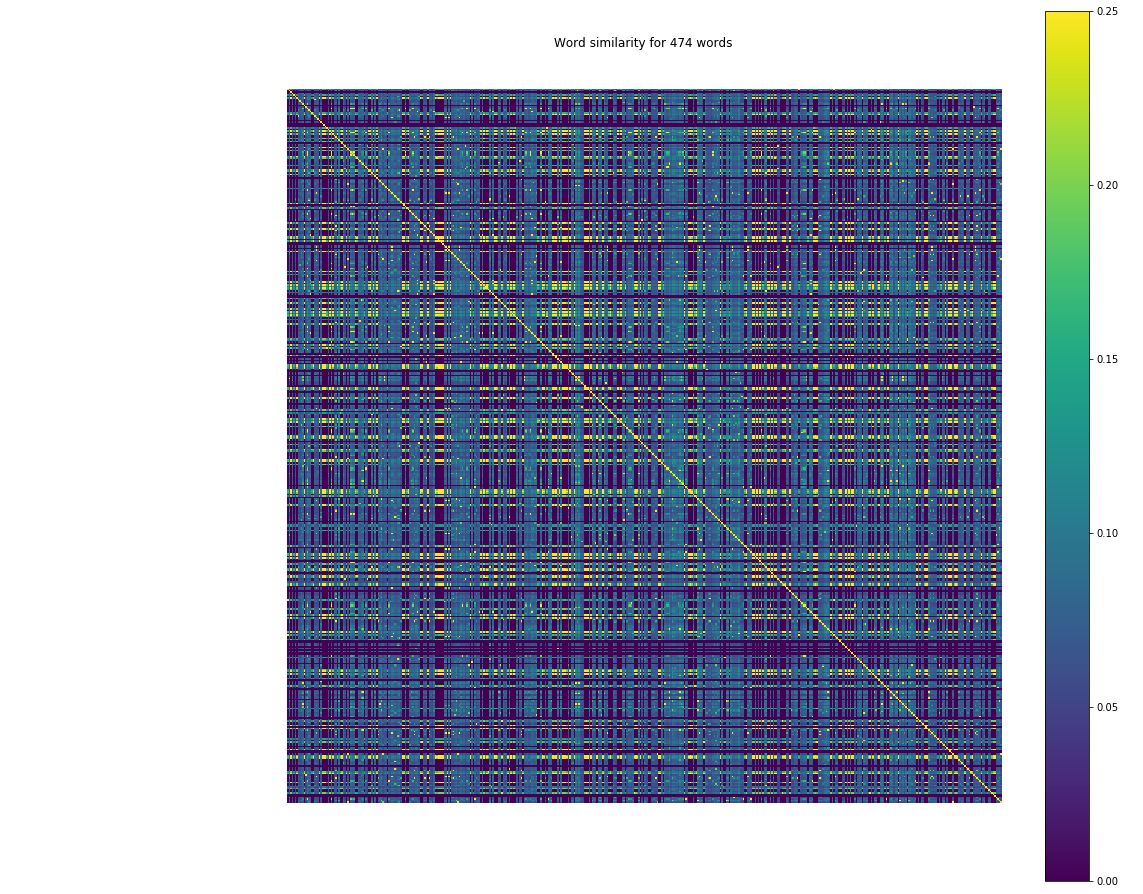

In [116]:
def plot_similarity(save=False):
    "Create a heatmap correlation style map for a given set of words"
    fig = pyplot.figure(figsize=(16, 16))
    ax = fig.add_subplot(111)
    cax = ax.matshow(distances, vmin=0.0, vmax=0.25)
    fig.colorbar(cax)
    ticks = np.arange(0,len(words),1)
    pyplot.title("Word similarity for {} words".format(len(words)))
    ax.axis('off') # remove me to show the axis
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(words)
    ax.set_yticklabels(words)
    pyplot.show()
    
    # Save a .png of the plot
    if save:
        fig.savefig("output/similarity-map.png")

plot_similarity(save=True)

## Getting the most valuable words:

It would be interesting to see which words are quite similar to the other words. This can be done by adding up all the items in the row. 

In [124]:
def sort_by_row():
    "Sort the row by their values and the figure out which words are similar"
    added_row = [np.sum(row) for row in distances]
    sorted_rows_index = np.argsort(-added_row)
    return sorted_rows_index
    
def list_sorted_rows(x=30):
    "Show the x most similar words"
    print("Printing {} most similar words:".format(x))
    sorted_rows = sort_by_row()
    for index, row_item in enumerate(sorted_rows):
        if index == x: break
        print(words[row_item].name().split('.')[0])
    
list_sorted_rows(x=50)

Printing 50 most similar words:


TypeError: bad operand type for unary -: 'list'

In [126]:
avgDists = np.array([1, 8, 6, 9, 4])
np.argsort(-avgDists)

array([3, 1, 2, 4, 0])